In [1]:
import argparse
import math
from random import randint
import torch
from torch import nn, optim
from torchsummary import summary
from torch.utils.data import DataLoader
from data_preprocessing import Feature_Selector_Dataset
import discharge_model 
from SeversonDataset_preprocess import train_val_split
from utils import *

In [2]:
def get_args_parser():
    parser = argparse.ArgumentParser('Discharge Model Feature Selector Training', add_help=False)
    parser.add_argument('--batch_size', default=64, type=int)
    parser.add_argument('--epochs', default=100, type=int)
    parser.add_argument('--seed', default=41, type=int)
    parser.add_argument('--detail_step', default=50, type=int)

    # Model parameters
    parser.add_argument('--model_name', default='Dim_Reduction_1', type=str) 
    parser.add_argument('--pred_target', default='EOL', type=str) 
    parser.add_argument('--finetune', default=False, type=bool)   
    parser.add_argument('--checkpoint', default='.pth', type=str)                  

    # Hyperparameters
    parser.add_argument('--weight_decay', type=float, default=1e-3)
    parser.add_argument('--lr', type=float, default=5e-4, metavar='LR')
    parser.add_argument('--lr_schedule', type=bool, default=False, metavar='LR')
    parser.add_argument('--min_lr', type=float, default=1e-5, metavar='LR')
    parser.add_argument('--warm_up', type=int, default=10, metavar='LR')
    parser.add_argument('--delta', type=int, default=1)

    return parser

 -- GPU is available -- 
(92, 6, 100)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 32, 500]             672
              Mish-2              [-1, 32, 500]               0
            Conv1d-3              [-1, 32, 500]           5,152
              Mish-4              [-1, 32, 500]               0
            Conv1d-5              [-1, 32, 500]           5,152
              Mish-6              [-1, 32, 500]               0
            Conv1d-7              [-1, 32, 500]           5,152
              Mish-8              [-1, 32, 500]               0
         MaxPool1d-9              [-1, 32, 250]               0
        MaxPool1d-10              [-1, 32, 250]               0
        MaxPool1d-11              [-1, 64, 125]               0
   SpatialDropout-12              [-1, 64, 125]               0
           Conv1d-13              [-1, 32, 125]          22,560
 

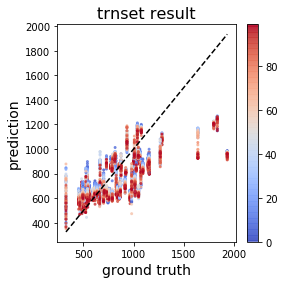

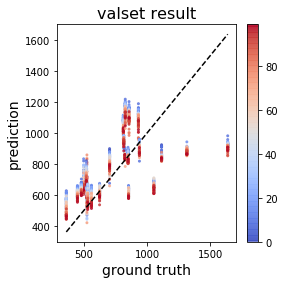

epoch:[11 / 100] batch:[50 / 144] loss: 0.357 lr: 5.000e-04
epoch:[11 / 100] batch:[100 / 144] loss: 0.547 lr: 5.000e-04
trn_loss: 0.477, val_loss: 0.848
real RMSE: 287, MAPE: 0.35
epoch:[12 / 100] batch:[50 / 144] loss: 0.374 lr: 5.000e-04
epoch:[12 / 100] batch:[100 / 144] loss: 0.452 lr: 5.000e-04
trn_loss: 0.463, val_loss: 0.499
real RMSE: 220, MAPE: 0.24
epoch:[13 / 100] batch:[50 / 144] loss: 0.252 lr: 5.000e-04
epoch:[13 / 100] batch:[100 / 144] loss: 0.290 lr: 5.000e-04
trn_loss: 0.471, val_loss: 0.860
real RMSE: 289, MAPE: 0.29
epoch:[14 / 100] batch:[50 / 144] loss: 0.259 lr: 5.000e-04
epoch:[14 / 100] batch:[100 / 144] loss: 0.387 lr: 5.000e-04
trn_loss: 0.451, val_loss: 0.749
real RMSE: 270, MAPE: 0.32
epoch:[15 / 100] batch:[50 / 144] loss: 0.280 lr: 5.000e-04
epoch:[15 / 100] batch:[100 / 144] loss: 0.395 lr: 5.000e-04
trn_loss: 0.357, val_loss: 0.745
real RMSE: 269, MAPE: 0.30
epoch:[16 / 100] batch:[50 / 144] loss: 0.453 lr: 5.000e-04
epoch:[16 / 100] batch:[100 / 144] 

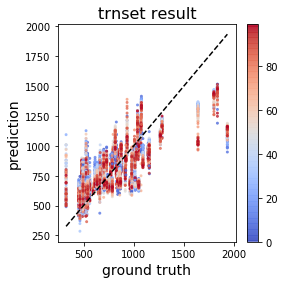

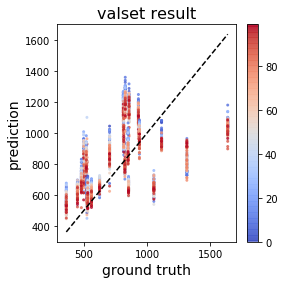

epoch:[21 / 100] batch:[50 / 144] loss: 0.435 lr: 5.000e-04
epoch:[21 / 100] batch:[100 / 144] loss: 0.311 lr: 5.000e-04
trn_loss: 0.330, val_loss: 0.768
real RMSE: 273, MAPE: 0.31
epoch:[22 / 100] batch:[50 / 144] loss: 0.497 lr: 5.000e-04
epoch:[22 / 100] batch:[100 / 144] loss: 0.492 lr: 5.000e-04
trn_loss: 0.345, val_loss: 0.529
real RMSE: 227, MAPE: 0.25
epoch:[23 / 100] batch:[50 / 144] loss: 0.222 lr: 5.000e-04
epoch:[23 / 100] batch:[100 / 144] loss: 0.198 lr: 5.000e-04
trn_loss: 0.396, val_loss: 0.564
real RMSE: 234, MAPE: 0.23
epoch:[24 / 100] batch:[50 / 144] loss: 0.306 lr: 5.000e-04
epoch:[24 / 100] batch:[100 / 144] loss: 0.427 lr: 5.000e-04
trn_loss: 0.381, val_loss: 0.805
real RMSE: 280, MAPE: 0.32
epoch:[25 / 100] batch:[50 / 144] loss: 0.399 lr: 5.000e-04
epoch:[25 / 100] batch:[100 / 144] loss: 0.317 lr: 5.000e-04
trn_loss: 0.336, val_loss: 0.548
real RMSE: 231, MAPE: 0.26
epoch:[26 / 100] batch:[50 / 144] loss: 0.259 lr: 5.000e-04
epoch:[26 / 100] batch:[100 / 144] 

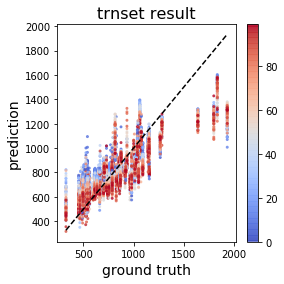

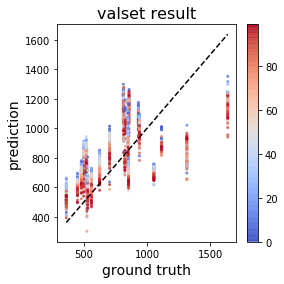

epoch:[31 / 100] batch:[50 / 144] loss: 0.312 lr: 5.000e-04
epoch:[31 / 100] batch:[100 / 144] loss: 0.325 lr: 5.000e-04
trn_loss: 0.368, val_loss: 0.702
real RMSE: 261, MAPE: 0.28
epoch:[32 / 100] batch:[50 / 144] loss: 0.342 lr: 5.000e-04
epoch:[32 / 100] batch:[100 / 144] loss: 0.154 lr: 5.000e-04
trn_loss: 0.302, val_loss: 0.590
real RMSE: 239, MAPE: 0.26
epoch:[33 / 100] batch:[50 / 144] loss: 0.300 lr: 5.000e-04
epoch:[33 / 100] batch:[100 / 144] loss: 0.200 lr: 5.000e-04
trn_loss: 0.411, val_loss: 0.636
real RMSE: 249, MAPE: 0.22
epoch:[34 / 100] batch:[50 / 144] loss: 0.287 lr: 5.000e-04
epoch:[34 / 100] batch:[100 / 144] loss: 0.288 lr: 5.000e-04
trn_loss: 0.538, val_loss: 0.918
real RMSE: 299, MAPE: 0.25
epoch:[35 / 100] batch:[50 / 144] loss: 0.232 lr: 5.000e-04
epoch:[35 / 100] batch:[100 / 144] loss: 0.175 lr: 5.000e-04
trn_loss: 0.370, val_loss: 0.756
real RMSE: 271, MAPE: 0.28
epoch:[36 / 100] batch:[50 / 144] loss: 0.223 lr: 5.000e-04
epoch:[36 / 100] batch:[100 / 144] 

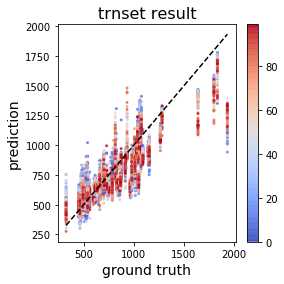

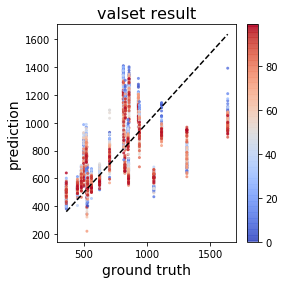

epoch:[41 / 100] batch:[50 / 144] loss: 0.540 lr: 5.000e-04
epoch:[41 / 100] batch:[100 / 144] loss: 0.193 lr: 5.000e-04
trn_loss: 0.294, val_loss: 0.643
real RMSE: 250, MAPE: 0.28
epoch:[42 / 100] batch:[50 / 144] loss: 0.181 lr: 5.000e-04
epoch:[42 / 100] batch:[100 / 144] loss: 0.490 lr: 5.000e-04
trn_loss: 0.305, val_loss: 0.688
real RMSE: 258, MAPE: 0.31
epoch:[43 / 100] batch:[50 / 144] loss: 0.264 lr: 5.000e-04
epoch:[43 / 100] batch:[100 / 144] loss: 0.230 lr: 5.000e-04
trn_loss: 0.244, val_loss: 0.810
real RMSE: 281, MAPE: 0.29
epoch:[44 / 100] batch:[50 / 144] loss: 0.212 lr: 5.000e-04
epoch:[44 / 100] batch:[100 / 144] loss: 0.178 lr: 5.000e-04
trn_loss: 0.245, val_loss: 0.726
real RMSE: 266, MAPE: 0.27
epoch:[45 / 100] batch:[50 / 144] loss: 0.300 lr: 5.000e-04
epoch:[45 / 100] batch:[100 / 144] loss: 0.169 lr: 5.000e-04
trn_loss: 0.311, val_loss: 0.792
real RMSE: 277, MAPE: 0.27
epoch:[46 / 100] batch:[50 / 144] loss: 0.193 lr: 5.000e-04
epoch:[46 / 100] batch:[100 / 144] 

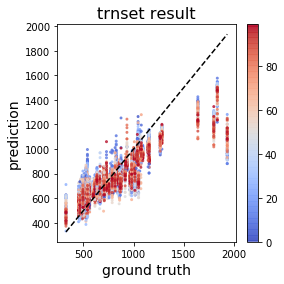

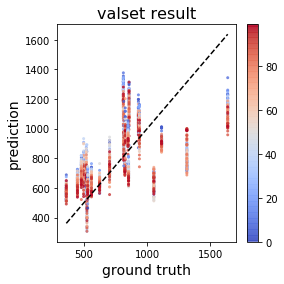

epoch:[51 / 100] batch:[50 / 144] loss: 0.129 lr: 5.000e-04
epoch:[51 / 100] batch:[100 / 144] loss: 0.192 lr: 5.000e-04
trn_loss: 0.233, val_loss: 0.670
real RMSE: 255, MAPE: 0.27
epoch:[52 / 100] batch:[50 / 144] loss: 0.187 lr: 5.000e-04
epoch:[52 / 100] batch:[100 / 144] loss: 0.188 lr: 5.000e-04
trn_loss: 0.311, val_loss: 0.712
real RMSE: 263, MAPE: 0.31
epoch:[53 / 100] batch:[50 / 144] loss: 0.185 lr: 5.000e-04
epoch:[53 / 100] batch:[100 / 144] loss: 0.210 lr: 5.000e-04
trn_loss: 0.249, val_loss: 0.536
real RMSE: 228, MAPE: 0.23
epoch:[54 / 100] batch:[50 / 144] loss: 0.138 lr: 5.000e-04
epoch:[54 / 100] batch:[100 / 144] loss: 0.215 lr: 5.000e-04
trn_loss: 0.310, val_loss: 0.789
real RMSE: 277, MAPE: 0.26
epoch:[55 / 100] batch:[50 / 144] loss: 0.150 lr: 5.000e-04
epoch:[55 / 100] batch:[100 / 144] loss: 0.156 lr: 5.000e-04
trn_loss: 0.217, val_loss: 0.627
real RMSE: 247, MAPE: 0.26
epoch:[56 / 100] batch:[50 / 144] loss: 0.168 lr: 5.000e-04
epoch:[56 / 100] batch:[100 / 144] 

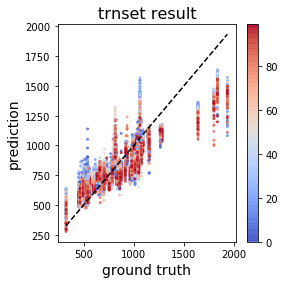

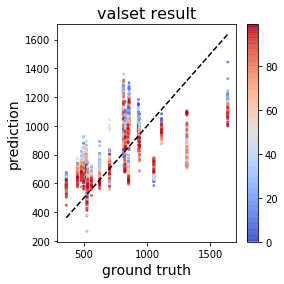

epoch:[61 / 100] batch:[50 / 144] loss: 0.176 lr: 5.000e-04
epoch:[61 / 100] batch:[100 / 144] loss: 0.278 lr: 5.000e-04
trn_loss: 0.234, val_loss: 0.687
real RMSE: 258, MAPE: 0.26
epoch:[62 / 100] batch:[50 / 144] loss: 0.098 lr: 5.000e-04
epoch:[62 / 100] batch:[100 / 144] loss: 0.380 lr: 5.000e-04
trn_loss: 0.203, val_loss: 0.709
real RMSE: 262, MAPE: 0.29
epoch:[63 / 100] batch:[50 / 144] loss: 0.111 lr: 5.000e-04
epoch:[63 / 100] batch:[100 / 144] loss: 0.184 lr: 5.000e-04
trn_loss: 0.201, val_loss: 0.632
real RMSE: 248, MAPE: 0.25
epoch:[64 / 100] batch:[50 / 144] loss: 0.147 lr: 5.000e-04
epoch:[64 / 100] batch:[100 / 144] loss: 0.102 lr: 5.000e-04
trn_loss: 0.249, val_loss: 0.623
real RMSE: 246, MAPE: 0.26
epoch:[65 / 100] batch:[50 / 144] loss: 0.108 lr: 5.000e-04
epoch:[65 / 100] batch:[100 / 144] loss: 0.192 lr: 5.000e-04
trn_loss: 0.254, val_loss: 0.680
real RMSE: 257, MAPE: 0.25
epoch:[66 / 100] batch:[50 / 144] loss: 0.108 lr: 5.000e-04
epoch:[66 / 100] batch:[100 / 144] 

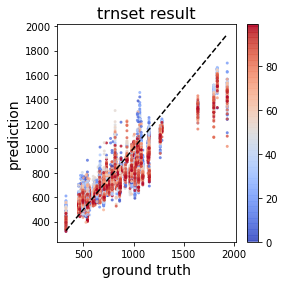

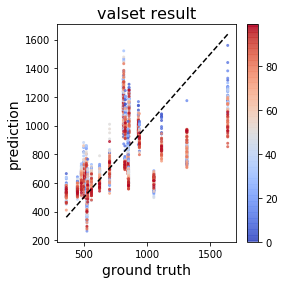

epoch:[71 / 100] batch:[50 / 144] loss: 0.305 lr: 5.000e-04
epoch:[71 / 100] batch:[100 / 144] loss: 0.130 lr: 5.000e-04
trn_loss: 0.231, val_loss: 0.568
real RMSE: 235, MAPE: 0.21
epoch:[72 / 100] batch:[50 / 144] loss: 0.187 lr: 5.000e-04
epoch:[72 / 100] batch:[100 / 144] loss: 0.289 lr: 5.000e-04
trn_loss: 0.324, val_loss: 0.669
real RMSE: 255, MAPE: 0.32
epoch:[73 / 100] batch:[50 / 144] loss: 0.249 lr: 5.000e-04
epoch:[73 / 100] batch:[100 / 144] loss: 0.186 lr: 5.000e-04
trn_loss: 0.173, val_loss: 0.668
real RMSE: 255, MAPE: 0.27
epoch:[74 / 100] batch:[50 / 144] loss: 0.208 lr: 5.000e-04
epoch:[74 / 100] batch:[100 / 144] loss: 0.175 lr: 5.000e-04
trn_loss: 0.217, val_loss: 0.792
real RMSE: 277, MAPE: 0.28
epoch:[75 / 100] batch:[50 / 144] loss: 0.178 lr: 5.000e-04
epoch:[75 / 100] batch:[100 / 144] loss: 0.141 lr: 5.000e-04
trn_loss: 0.193, val_loss: 0.693
real RMSE: 259, MAPE: 0.27
epoch:[76 / 100] batch:[50 / 144] loss: 0.190 lr: 5.000e-04
epoch:[76 / 100] batch:[100 / 144] 

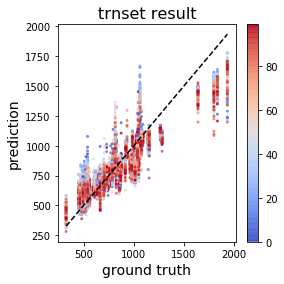

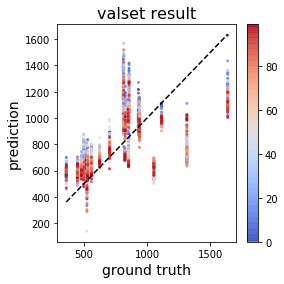

epoch:[81 / 100] batch:[50 / 144] loss: 0.110 lr: 5.000e-04
epoch:[81 / 100] batch:[100 / 144] loss: 0.152 lr: 5.000e-04
trn_loss: 0.185, val_loss: 0.647
real RMSE: 251, MAPE: 0.25
epoch:[82 / 100] batch:[50 / 144] loss: 0.128 lr: 5.000e-04
epoch:[82 / 100] batch:[100 / 144] loss: 0.105 lr: 5.000e-04
trn_loss: 0.188, val_loss: 0.645
real RMSE: 250, MAPE: 0.23
epoch:[83 / 100] batch:[50 / 144] loss: 0.152 lr: 5.000e-04
epoch:[83 / 100] batch:[100 / 144] loss: 0.277 lr: 5.000e-04
trn_loss: 0.254, val_loss: 0.641
real RMSE: 250, MAPE: 0.26
epoch:[84 / 100] batch:[50 / 144] loss: 0.164 lr: 5.000e-04
epoch:[84 / 100] batch:[100 / 144] loss: 0.137 lr: 5.000e-04
trn_loss: 0.221, val_loss: 0.582
real RMSE: 238, MAPE: 0.24
epoch:[85 / 100] batch:[50 / 144] loss: 0.338 lr: 5.000e-04
epoch:[85 / 100] batch:[100 / 144] loss: 0.196 lr: 5.000e-04
trn_loss: 0.218, val_loss: 0.633
real RMSE: 248, MAPE: 0.25
epoch:[86 / 100] batch:[50 / 144] loss: 0.146 lr: 5.000e-04
epoch:[86 / 100] batch:[100 / 144] 

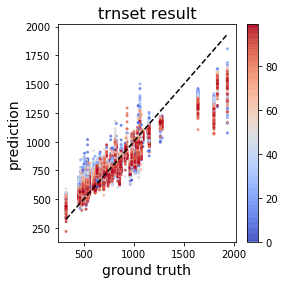

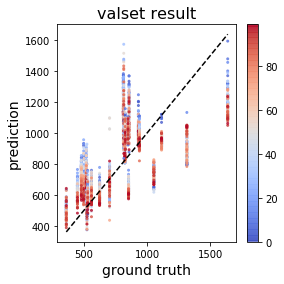

epoch:[91 / 100] batch:[50 / 144] loss: 0.167 lr: 5.000e-04
epoch:[91 / 100] batch:[100 / 144] loss: 0.107 lr: 5.000e-04
trn_loss: 0.257, val_loss: 0.717
real RMSE: 264, MAPE: 0.23
epoch:[92 / 100] batch:[50 / 144] loss: 0.211 lr: 5.000e-04
epoch:[92 / 100] batch:[100 / 144] loss: 0.070 lr: 5.000e-04
trn_loss: 0.294, val_loss: 0.748
real RMSE: 269, MAPE: 0.34
epoch:[93 / 100] batch:[50 / 144] loss: 0.146 lr: 5.000e-04
epoch:[93 / 100] batch:[100 / 144] loss: 0.175 lr: 5.000e-04
trn_loss: 0.167, val_loss: 0.731
real RMSE: 267, MAPE: 0.28
epoch:[94 / 100] batch:[50 / 144] loss: 0.180 lr: 5.000e-04
epoch:[94 / 100] batch:[100 / 144] loss: 0.106 lr: 5.000e-04
trn_loss: 0.188, val_loss: 0.584
real RMSE: 238, MAPE: 0.23
epoch:[95 / 100] batch:[50 / 144] loss: 0.228 lr: 5.000e-04
epoch:[95 / 100] batch:[100 / 144] loss: 0.263 lr: 5.000e-04
trn_loss: 0.190, val_loss: 0.589
real RMSE: 239, MAPE: 0.24
epoch:[96 / 100] batch:[50 / 144] loss: 0.167 lr: 5.000e-04
epoch:[96 / 100] batch:[100 / 144] 

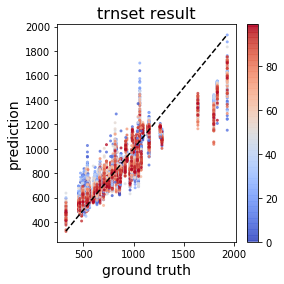

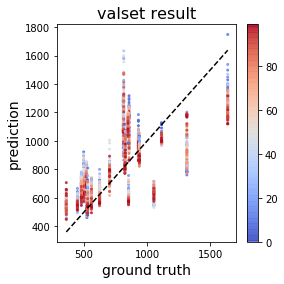

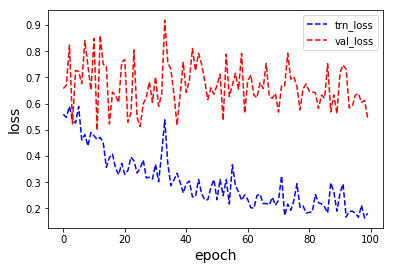

In [3]:
args = get_args_parser()
args, unknown = args.parse_known_args()
if torch.cuda.is_available():
    print(" -- GPU is available -- ")

# 根據random seed，隨機分割訓練及測試集
train_val_split(seed=args.seed)

# pytorch_dataset_preprocessing(seed=args.seed, folder='Severson_Dataset/')
trn_set = Feature_Selector_Dataset(train=True, pred_target=args.pred_target, part='discharge', norm=True)
val_set = Feature_Selector_Dataset(train=False, pred_target=args.pred_target, part='discharge', norm=True)
trn_loader = DataLoader(trn_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=True)
val_loader = DataLoader(val_set, batch_size=args.batch_size, num_workers=0, drop_last=False, shuffle=False)

model = discharge_model.__dict__[args.model_name](4, 1, 0.2).apply(init_weights).cuda()
if args.finetune:
    model.load_state_dict(torch.load(args.checkpoint))
summary(model, (4, 500))

optimizer = optim.AdamW(model.parameters(), lr=args.lr, amsgrad=True, weight_decay=args.weight_decay)
criterion = nn.MSELoss()
# criterion = nn.HuberLoss(delta=args.delta)

best_rmse = 1000
trn_loss_record, val_loss_record = [], []
for epoch in range(args.epochs):
    model.train()
    step = 0
    n_minibatch = math.ceil(len(trn_set)/args.batch_size)
    if args.lr_schedule:
        adjust_learning_rate(optimizer, args.epochs, epoch+1, args.warm_up, args.lr, args.min_lr)
    for inputs, targets in trn_loader:
        step += 1
        optimizer.zero_grad()
        outputs = model(inputs.cuda().float())
        loss = criterion(outputs, targets.reshape(-1, 1).cuda().float())
        loss.backward()
        optimizer.step()
        if step%args.detail_step==0:
            print('epoch:[%d / %d] batch:[%d / %d] loss: %.3f lr: %.3e' % (epoch+1, args.epochs, step, n_minibatch, loss, optimizer.param_groups[0]["lr"]))

    # model evaluation per epoch
    model.eval()
    with torch.no_grad():
        trn_loss, trn_batch = 0, 0
        for inputs, targets in trn_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            trn_loss += loss
            trn_batch += 1
        val_loss, val_batch = 0, 0
        for inputs, targets in val_loader:
            output = model(inputs.cuda().float())
            loss = criterion(output, targets.reshape(-1, 1).cuda().float())
            val_loss += loss
            val_batch += 1
        trn_loss_record.append((trn_loss/trn_batch).cpu())
        val_loss_record.append((val_loss/val_batch).cpu())
        print('trn_loss: %.3f, val_loss: %.3f' % ((trn_loss/trn_batch), (val_loss/val_batch)))

    # inverse transform to real target
    rmse, mape = real_RMSE_and_MAPE(model, val_loader, args.pred_target)
    print('real RMSE: %d, MAPE: %.2f' % (rmse, mape))
    if (epoch+1)%10 == 0:
        pred_result(model, trn_set, 'trn', args.pred_target)        
        pred_result(model, val_set, 'val', args.pred_target)
torch.save(model.state_dict(), args.model_name+'_seed'+str(args.seed)+'.pth')

# training finished
loss_profile(trn_loss_record, val_loss_record)